In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:\\AI PROJECT\\train_clean.csv')

# Display the first few rows of the dataset
print(df.head())

# Get a concise summary of the dataset
print(df.info())


   beds  baths    size  lot_size  zip_code      price
0     3    2.5  2590.0    6000.0     98144   795000.0
1     4    2.0  2240.0   13503.6     98106   915000.0
2     4    3.0  2040.0    3783.0     98107   950000.0
3     4    3.0  3800.0    5175.0     98199  1950000.0
4     2    2.0  1190.0   43560.0     98107   740000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      1660 non-null   int64  
 1   baths     1660 non-null   float64
 2   size      1660 non-null   float64
 3   lot_size  1660 non-null   float64
 4   zip_code  1660 non-null   int64  
 5   price     1660 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 77.9 KB
None


In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame from the previous steps

# Handle missing values if necessary
# df.fillna(method='ffill', inplace=True)  # Example method, adjust as needed

# Encode categorical variables if present (adjust based on your dataset)
# df = pd.get_dummies(df, drop_first=True)

# Standardize the features
features = df.select_dtypes(include=[np.number])  # Selecting only numeric features for standardization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Note: If you plan to apply models that require a target variable (e.g., GLM), ensure to define your target before splitting the data
# Example for a supervised learning setup (optional at this stage):
# X_train, X_test, y_train, y_test = train_test_split(features_scaled, df['YourTargetColumnName'], test_size=0.2, random_state=42)


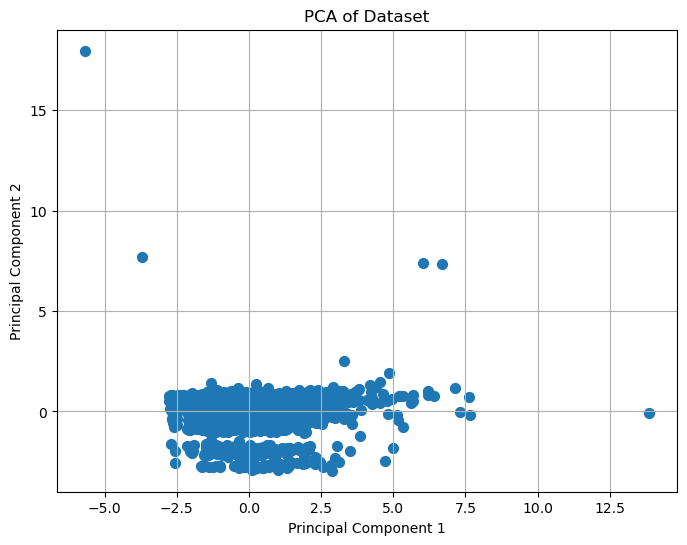

Explained variance ratio: [0.41500145 0.17459639]


In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # We choose 2 for easy visualization
principalComponents = pca.fit_transform(features_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.grid(True)
plt.show()

# Display explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

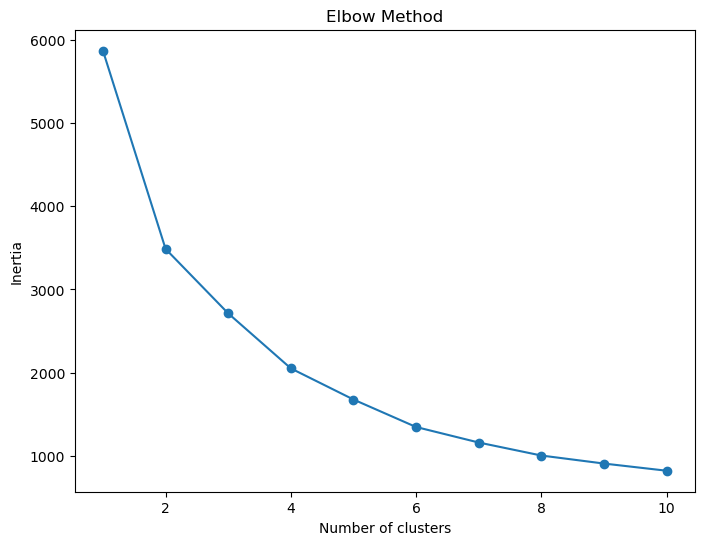

D:\M1\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


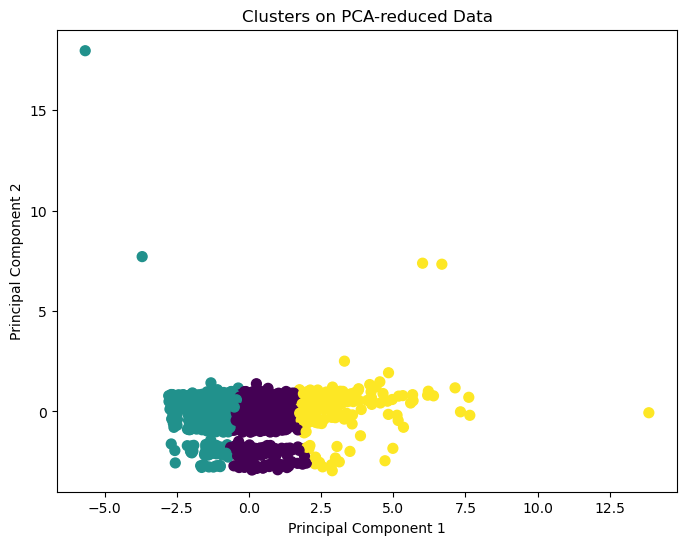

In [6]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(principalComponents)  # Fit on the PCA results
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Apply K-means clustering with the chosen number of clusters
# This number should be chosen based on the Elbow plot
n_clusters = 3  # Example: Choose 3 based on the Elbow plot
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(principalComponents)

# Visualize the clustering result on the PCA-reduced data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=cluster_labels, s=50, cmap='viridis')
plt.title('Clusters on PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [8]:
# Print all column names to identify the correct target variable
print(df.columns)


Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'target' is the name of your target variable
# Make sure to replace 'target' with the actual name of your target column
X = features_scaled  # Features from the preprocessing step
y = df['beds']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GLM model
glm_model = LinearRegression()

# Fit the model
glm_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = glm_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 1.2224967943861764e-30
R^2 Score: 1.0


In [11]:
from sklearn.model_selection import cross_val_score

# Assuming glm_model is your fitted model and X, y are your features and target variable
scores = cross_val_score(glm_model, X, y, cv=5, scoring='r2')  # For regression models; use a different scoring for classification

print("Cross-validated R^2 scores:", scores)
print("Average R^2 score:", scores.mean())



Cross-validated R^2 scores: [1. 1. 1. 1. 1.]
Average R^2 score: 1.0
